In [277]:
import numpy as np 
import matplotlib.pyplot as pl 
π= np.pi 
import thinkdsp
from IPython.display import Audio
import numpy.fft as nft

In [427]:
def plotWav(x, sr= 1, **kwargs): #To plot the signal

    ts= np.arange(len(x))/sr
    pl.plot(ts, x,**kwargs)
    pl.grid()
    #pl.legend(['0','1'])
    if sr==1:
        pl.xlabel('sample')
    else:
        pl.xlabel('sec')
        
def window(ys): #Smoothing the leakage between begin and end of segment
    ham = np.hamming(len(ys))
    ys = ys*ham
    return ys
        
def spec2d(X, log=True): 
     
    X= X.T 
     
    if log==True: 
        X= np.log(X) 
     
    pl.imshow(X, origin='lower', cmap= 'rainbow') 
     
    pl.colorbar() 
    pl.xlabel('n') 
    pl.ylabel('k') 
    pl.title('spec2d') 
     
def makeSpectogram(ys, seg_length=1024, window='no'): 
     
    i, j= 0, seg_length
    step= seg_length // 2
     
    spectogram= []  

     
    while j < len(ys):       
        segment= ys[i:j]
         
        #spec= np.fft.fft(segment)  
        spec= np.fft.rfft(segment)  
         
        spectogram += [spec] 
         
        i += step 
        j += step 
         
    spectogram= np.vstack(spectogram)     
    spectogram= np.abs(spectogram) 
     
    spec2d(spectogram)
    
     
    return spectogram 


def genChirpSignal( 
    time=  1, 
    start=  440, 
    end=  880, 
    style= 'linear', 
    amp=  1,    
    sr= 44100,
    transform='default'): #Adding Transform to change signal
     
    ts= np.linspace(0, time, sr*time) 
    print(ts) 
     
    def linear_style(ts):        
        fs= start + (end-start)/time * ts 
        return fs 
     
    def exponential_style(ts):        
        fs= start * (end-start)**(ts/time)
        return fs 
     
    def sinusoidal_style(ts):        
        fs= (end-start)*(1 + np.sin(2 * π * ts/time*3)) 
        return fs 
     
    def square_style(ts):        
        fs= start + (end-start)/time**2 * ts**2  
        return fs 
     
    def sawtooth_style(ts):        
        frac, _= np.modf(ts) 
        fs= frac*(end-start)+start 
        return fs 
     
    def unknown_style(ts, T0=1):        
        fs= np.random.random(len(ts))*(end-start)+start 
        return fs 
    
    #Changing signal into noise
    def noise(ts):
        fs = np.random.normal(0,1,len(ts))*(end-start)   
        return fs 
    
    def pinkNoise(ts):
        fs = np.random.normal(0,1,len(ts))*(end-start)/start   
        return fs 
    
    def sinNoise(ts):
        fs = np.random.normal(15,15,len(ts))* (1 + np.sin(2 * π * ts/time*3))  
        return fs
    
    if style in ['linear', 'lin', 'l']:    
        fs= linear_style(ts) 
    elif style in ['exponential', 'exp', 'e']:    
        fs= exponential_style(ts) 
    elif style in ['sinusoidal', 'sin', 's']:  
        fs= sinusoidal_style(ts) 
    elif style in ['square', 'squ', 'sq']:    
        fs= square_style(ts) 
    elif style in ['sawtooth', 'saw', 'sa']:    
        fs= sawtooth_style(ts)
        
    #noise condition
    elif style in ['noise', 'no', 'n']:
        fs= noise(ts)
    elif style in ['sinNoise', 'sinN', 'SN']:
        fs= sinNoise(ts)
    elif style in ['pinkNoise', 'pinkN', 'PN']:
        fs= pinkNoise(ts)
    else: 
        print('style unknown') 
        fs= unknown_style(ts) 
     
    ws= 2*π*fs 
     
    dt=  time/len(ts) 
    θ=   np.cumsum(ws)*dt 
     
    ys= amp * np.sin(θ)
    
    #Transform signal using FFT    
    def fft(ys):
        ys = nft.fft(ys)
        return ys
    
    if transform in ['fft']:    
        ys = fft(ys)
    elif transform in ['default']:
        ys
    else:
        print('none')
    
    audio = Audio(data=ys, rate=11025) #Generate Audio
    
    return sr, ys , audio

In [431]:
sr, x, wave = genChirpSignal(style='exp')


[0.00000000e+00 2.26762512e-05 4.53525023e-05 ... 9.99954647e-01
 9.99977324e-01 1.00000000e+00]


array([ 0.06264832,  0.12505911,  0.18698694, ...,  0.46720867,
        0.20717242, -0.78313523])

In [433]:
a = window(x)
a

array([ 0.00501187,  0.01000473,  0.01495896, ...,  0.0373767 ,
        0.01657379, -0.06265082])

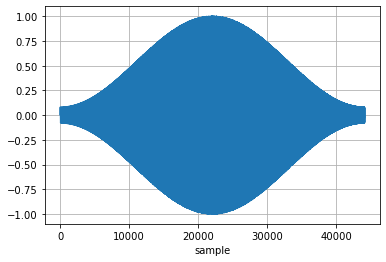

In [434]:
plotWav(a)

In [389]:
sr, x, wave = genChirpSignal(style='exp', transform='fft')
x2 = np.hamming(len(x))
x2

[0.00000000e+00 2.26762512e-05 4.53525023e-05 ... 9.99954647e-01
 9.99977324e-01 1.00000000e+00]


/home/amiya/anaconda3/lib/python3.7/site-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


array([0.08      , 0.08      , 0.08000002, ..., 0.08000002, 0.08      ,
       0.08      ])

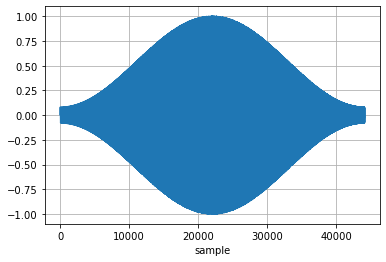

In [440]:
plotWav(a)

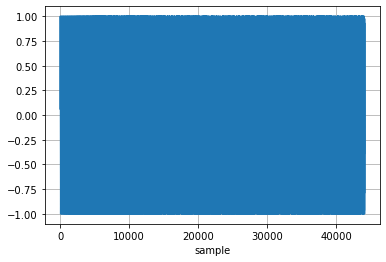

In [439]:
plotWav(x)

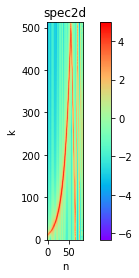

In [437]:
ombak = makeSpectogram(a)

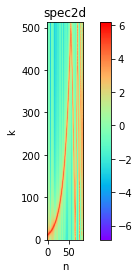

In [438]:
ombak = makeSpectogram(x)

/home/amiya/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


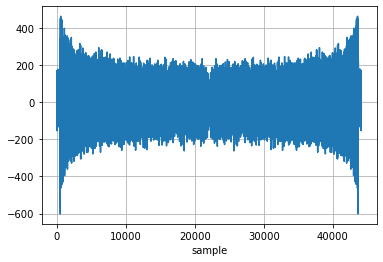

In [302]:
plotWav(x)

[0.00000000e+00 2.26757884e-05 4.53515768e-05 ... 9.99995465e+00
 9.99997732e+00 1.00000000e+01]


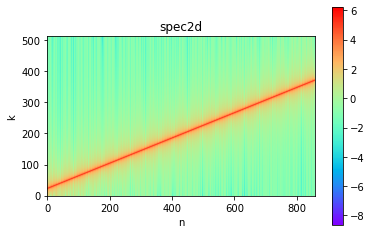

In [442]:
sr, x, wave = genChirpSignal(time=10, start=1000, end=16000, style='linear')
X = makeSpectogram(x, seg_length=1024)

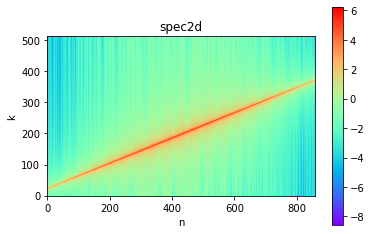

In [444]:
a = window(x)
Y = makeSpectogram(a, seg_length=1024)